## Time Series Analysis on Sale- Regression Model

# Business understanding 

# Hypothesis
### Null Hypothesis: Promotions have no significant effect on product sales.
### Alternate Hypothesis:  Promotions positively impact product sales, leading to increased sales during promotional periods.


# 5 Analytic Question
 1)	What is the effect of seasonal variations (e.g., Monthly, or quarterly patterns) on total sales?
 2)	What store is the highest performer in terms of sales?
 3)	What are the best-selling products per location?
 4)	Does store size affect total sales?
 5)	Which days have the most sales?




### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [78]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### - Import all the necessary packages

In [79]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [80]:
environment_variables = dotenv_values('.env')
    
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
    
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)

# Data for the Project
1. First dataset - the oil,holiday and stores data was extracted from Microsoft SQL Server
2. Second dataset - the train and transaction of the dataset was downloaded from a GitHub repository
3. Third dataset - The test and submission of the data was downloaded from Onedrive

In [81]:
# extract data from Table 1: dbo.oil
# assign it to data_oil
# preview data_oil

query="Select * from dbo.oil" 
data_oil=pd.read_sql(query, connection)

data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [82]:
data_oil.shape

(1218, 2)

In [83]:
data_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [84]:
data_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [85]:
# Save extracted data as data_oil.csv

data_oil.to_csv('data_oil.csv')

In [86]:
# extract data from Table 2: dbo.holidays_events
# assign it to data_oil
# preview data_oil

query2="Select * from dbo.holidays_events" 
data_holiday=pd.read_sql(query2, connection)

data_holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [87]:
data_holiday.shape

(350, 6)

In [88]:
data_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [89]:
data_holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [90]:
# Save extracted data as data_holiday.csv

data_holiday.to_csv('data_holiday.csv')

In [91]:
# extract data from Table 3: dbo.stores
# assign it to data_stores
# preview data_stores

query3="Select * from dbo.stores" 
data_stores=pd.read_sql(query3, connection)

data_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [92]:
data_stores.shape

(54, 5)

In [93]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [94]:
data_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [95]:
# Save extracted data as data3.csv

data_stores.to_csv('data_stores.csv')

In [96]:
data_sub = pd.read_excel('E:/LP3 dataset/sample_submission.xlsx')

In [97]:
data_sub.head(5)

,id,sales
0,3000888,0
1,3000889,0
2,3000890,0
3,3000891,0
4,3000892,0


In [98]:
data_trans = pd.read_csv('E:/LP3 dataset/transactions.csv')

In [99]:
data_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [100]:
data_trans.shape

(83488, 3)

In [101]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [102]:
data_trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [103]:
data_test= pd.read_excel('E:/LP3 dataset/test.xlsx')

In [104]:
data_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [105]:
data_test.shape

(28512, 5)

In [106]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [107]:
data_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [108]:
data_train= pd.read_csv('E:/LP3 dataset/train.csv')

In [109]:
data_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [110]:
data_train.shape

(3000888, 6)

In [111]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [112]:
data_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

### Merging the dataset 

In [113]:
# merge data_oil and data_holiday on the 'date' column
merged_df = data_oil.merge(data_holiday, on ='date', how = 'inner')
#merge data_transcation on the 'date' column
merged_df_1 = merged_df.merge( data_trans, on ='date', how = 'inner')
# merge the result with data_store on 'type' column
#merge_data = merged_df_1.merge(data_stores, on = ['store_nbr'], how = 'outer'), #suffixes=('_type', '_stores'))

# Merge the result with data_store on 'store_nbr' column
merge_data = merged_df_1.merge(data_stores, on='store_nbr', how='inner', suffixes=('_oil_holiday', '_stores'))
# Rename the columns 'type_oil_holiday' and 'type_stores'
merge_data.rename(columns={'type_oil_holiday': 'holiday', 'type_stores': 'type'}, inplace=True)
#merge_data = merge_data[0]
print(merge_data.head(5))


         date  dcoilwtico  holiday    locale locale_name  \
0  2013-01-01         NaN  Holiday  National     Ecuador   
1  2013-02-11   97.010002  Holiday  National     Ecuador   
2  2013-02-12   97.480003  Holiday  National     Ecuador   
3  2013-04-01   97.099998  Holiday  Regional    Cotopaxi   
4  2013-04-12   91.230003  Holiday     Local      Cuenca   

                     description  transferred  store_nbr  transactions  \
0             Primer dia del ano        False         25           770   
1                       Carnaval        False         25          2763   
2                       Carnaval        False         25          1420   
3  Provincializacion de Cotopaxi        False         25           909   
4            Fundacion de Cuenca        False         25          1099   

      city        state type  cluster  
0  Salinas  Santa Elena    D        1  
1  Salinas  Santa Elena    D        1  
2  Salinas  Santa Elena    D        1  
3  Salinas  Santa Elena    D      

In [114]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9759 entries, 0 to 9758
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          9759 non-null   object 
 1   dcoilwtico    9091 non-null   float64
 2   holiday       9759 non-null   object 
 3   locale        9759 non-null   object 
 4   locale_name   9759 non-null   object 
 5   description   9759 non-null   object 
 6   transferred   9759 non-null   bool   
 7   store_nbr     9759 non-null   int64  
 8   transactions  9759 non-null   int64  
 9   city          9759 non-null   object 
 10  state         9759 non-null   object 
 11  type          9759 non-null   object 
 12  cluster       9759 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 924.6+ KB


In [115]:
#merging the data with the train data 
train = merge_data.merge(data_train, on=['store_nbr', 'date'], how='inner', suffixes=('_data', '_stores'))

In [116]:
train.shape

(322047, 17)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          322047 non-null  object 
 1   dcoilwtico    300003 non-null  float64
 2   holiday       322047 non-null  object 
 3   locale        322047 non-null  object 
 4   locale_name   322047 non-null  object 
 5   description   322047 non-null  object 
 6   transferred   322047 non-null  bool   
 7   store_nbr     322047 non-null  int64  
 8   transactions  322047 non-null  int64  
 9   city          322047 non-null  object 
 10  state         322047 non-null  object 
 11  type          322047 non-null  object 
 12  cluster       322047 non-null  int64  
 13  id            322047 non-null  int64  
 14  family        322047 non-null  object 
 15  sales         322047 non-null  float64
 16  onpromotion   322047 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [118]:
#converting the date column to datetime
train['date'] = pd.to_datetime(train['date'])


In [119]:
# convert the index to a datatimeindex
train.index = pd.to_datetime(train.index)
#use pandas time_based indexing 
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['Weekday Name'] = train.index.day_name()

In [120]:
train.isnull().sum()

date                0
dcoilwtico      22044
holiday             0
locale              0
locale_name         0
description         0
transferred         0
store_nbr           0
transactions        0
city                0
state               0
type                0
cluster             0
id                  0
family              0
sales               0
onpromotion         0
Year                0
Month               0
Day                 0
Weekday Name        0
dtype: int64

In [121]:
# imputing the missing value with fillna 
train['dcoilwtico'].fillna(train['dcoilwtico'].mean(), inplace=True)

In [122]:
train.isnull().sum()

date            0
dcoilwtico      0
holiday         0
locale          0
locale_name     0
description     0
transferred     0
store_nbr       0
transactions    0
city            0
state           0
type            0
cluster         0
id              0
family          0
sales           0
onpromotion     0
Year            0
Month           0
Day             0
Weekday Name    0
dtype: int64

In [123]:
train.head(5)

,date,dcoilwtico,holiday,locale,locale_name,description,transferred,store_nbr,transactions,city,...,type,cluster,id,family,sales,onpromotion,Year,Month,Day,Weekday Name
1970-01-01 00:00:00.000000000,2013-01-01,64.077912,Holiday,National,Ecuador,Primer dia del ano,False,25,770,Salinas,...,D,1,561,AUTOMOTIVE,0.0,0,1970,1,1,Thursday
1970-01-01 00:00:00.000000001,2013-01-01,64.077912,Holiday,National,Ecuador,Primer dia del ano,False,25,770,Salinas,...,D,1,562,BABY CARE,0.0,0,1970,1,1,Thursday
1970-01-01 00:00:00.000000002,2013-01-01,64.077912,Holiday,National,Ecuador,Primer dia del ano,False,25,770,Salinas,...,D,1,563,BEAUTY,2.0,0,1970,1,1,Thursday
1970-01-01 00:00:00.000000003,2013-01-01,64.077912,Holiday,National,Ecuador,Primer dia del ano,False,25,770,Salinas,...,D,1,564,BEVERAGES,810.0,0,1970,1,1,Thursday
1970-01-01 00:00:00.000000004,2013-01-01,64.077912,Holiday,National,Ecuador,Primer dia del ano,False,25,770,Salinas,...,D,1,565,BOOKS,0.0,0,1970,1,1,Thursday


In [124]:
train.shape

(322047, 21)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 322047 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000322046
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          322047 non-null  datetime64[ns]
 1   dcoilwtico    322047 non-null  float64       
 2   holiday       322047 non-null  object        
 3   locale        322047 non-null  object        
 4   locale_name   322047 non-null  object        
 5   description   322047 non-null  object        
 6   transferred   322047 non-null  bool          
 7   store_nbr     322047 non-null  int64         
 8   transactions  322047 non-null  int64         
 9   city          322047 non-null  object        
 10  state         322047 non-null  object        
 11  type          322047 non-null  object        
 12  cluster       322047 non-null  int64         
 13  id            322047 non-null  int64         
 14  family        322047 non

In [126]:
# cheacking the range of date 
train['date'].min(),train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

## EDA

# Plotting the time series data to visualize trends, seasonality, and patterns

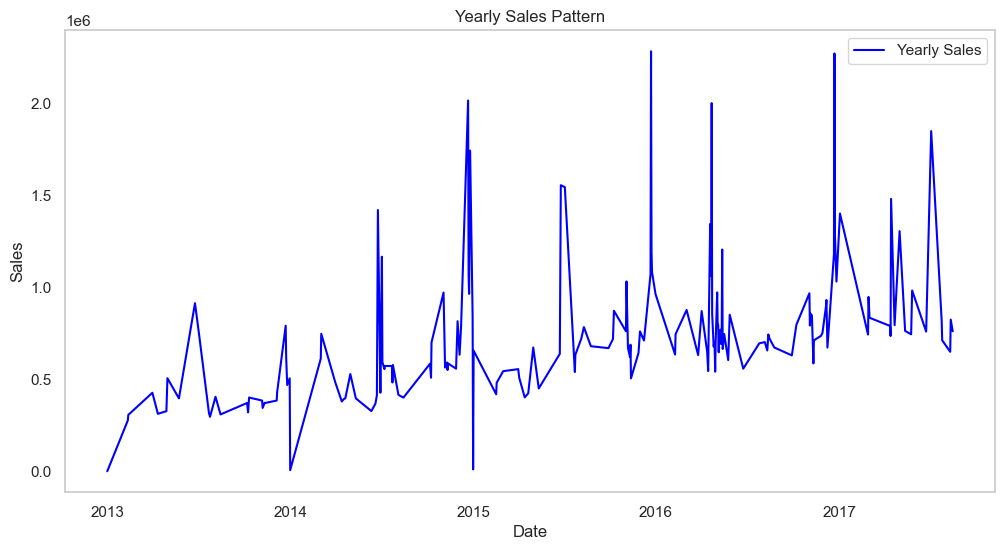

In [128]:
# Plotting daily sales
yearly_sales = train.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], yearly_sales['sales'], label='Yearly Sales', color='blue')
plt.title('Yearly Sales Pattern')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(False)
plt.legend()
plt.show()

The graph shows the actual sales values over time. Looking at the plot, you can see that there is a noticeable upward trend in sales. 
While the overall trend is upward, you might also notice some fluctuations around certain time points. These fluctuations could be due to specific events, promotions, holidays, or other external factors that influence sales. 